# heatmap

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
output_data = pd.read_csv("/Users/SailahariMullapudi/Desktop/PanPred-master/test_data/Metadata.csv")
R = ['R']

In [3]:
for antibiotic in ["CTZ"]:

    df_count = output_data.groupby(['Year', antibiotic])['Isolate'].count().reset_index().rename(columns={antibiotic: "Resistance", "Isolate": antibiotic})
    df_sum = df_count.groupby(['Year']).sum().rename(columns={antibiotic: f"SR_{antibiotic}_Sum"})
    df_merge = pd.merge(df_count, df_sum,  how='left', on=['Year']).rename(columns={antibiotic: "Antibiotic_Value", f"SR_{antibiotic}_Sum": "Antibitoic_Sum"})
    df_result = df_merge[df_merge['Resistance'].isin(R)]
    df_proportion = df_result.assign(Proportion = (df_result.Antibiotic_Value / df_result.Antibitoic_Sum) * 100).assign(Antibiotic = antibiotic)

df_proportion.head()

,Year,Resistance,Antibiotic_Value,Antibitoic_Sum,Proportion,Antibiotic
4,1998.0,R,1,3,33.333333,CTZ
8,2002.0,R,5,107,4.672897,CTZ
10,2003.0,R,3,107,2.803738,CTZ
12,2004.0,R,3,109,2.752294,CTZ
14,2005.0,R,8,111,7.207207,CTZ


In [4]:
all_antibiotics = ["CTX", "AMP", "AMX", "AMC", "TZP", "CXM", "CET", "GEN", "TBM", "TMP", "CIP"] 
for antibiotic in all_antibiotics:

    df_count = output_data.groupby(['Year', antibiotic])['Isolate'].count().reset_index().rename(columns={antibiotic: "Resistance", "Isolate": antibiotic})
    df_sum = df_count.groupby(['Year']).sum().rename(columns={antibiotic: f"SR_{antibiotic}_Sum"})
    df_merge = pd.merge(df_count, df_sum,  how='left', on=['Year']).rename(columns={antibiotic: "Antibiotic_Value", f"SR_{antibiotic}_Sum": "Antibitoic_Sum"})
    df_result = df_merge[df_merge['Resistance'].isin(R)]
    df_proportion_temp = df_result.assign(Proportion = (df_result.Antibiotic_Value / df_result.Antibitoic_Sum) * 100).assign(Antibiotic = antibiotic)
    df_proportion = pd.concat([df_proportion, df_proportion_temp], ignore_index=True)

In [5]:
df_proportion

,Year,Resistance,Antibiotic_Value,Antibitoic_Sum,Proportion,Antibiotic
0,1998.0,R,1,3,33.333333,CTZ
1,2002.0,R,5,107,4.672897,CTZ
2,2003.0,R,3,107,2.803738,CTZ
3,2004.0,R,3,109,2.752294,CTZ
4,2005.0,R,8,111,7.207207,CTZ
...,...,...,...,...,...,...
177,2012.0,R,18,99,18.181818,CIP
178,2013.0,R,1,3,33.333333,CIP
179,2014.0,R,5,10,50.000000,CIP
180,2015.0,R,94,163,57.668712,CIP


<AxesSubplot:xlabel='Year', ylabel='Antibiotic'>

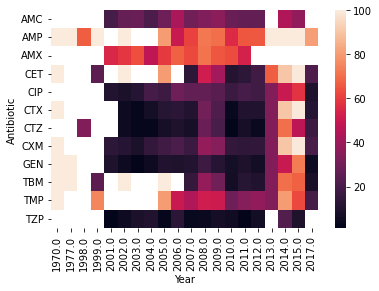

In [6]:
# reshape dataset in proper format to create seaborn heatmap
heatmap_df = df_proportion.pivot('Antibiotic', 'Year', 'Proportion') 

sns.heatmap(heatmap_df)

In [7]:
# patterns within different antibiotics (AMP + AMX, etc.)
# check if they mention why they chose the specific antibiotics 